<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/SusyPrimoEsperimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import json
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# file con i dati di tutti i ristoranti random
sort = 'Random'

relevance = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

In [3]:
#RACCOLTA DATI

#Percentuali di japanese, mexican e american per ogni ristorante

totaleTupelo = len(res[(res['restaurant'] == 'TupeloHoney')])
japaneseTupelo = (len(res[(res['restaurant'] == 'TupeloHoney') & (res['ethnicity'] == 'asian')]) * 100) / totaleTupelo
mexicanTupelo = (len(res[(res['restaurant'] == 'TupeloHoney') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleTupelo
americanTupelo = ((len(res[((res['restaurant'] == 'TupeloHoney') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'TupeloHoney') & (res['ethnicity'] == 'white'))])) * 100) / totaleTupelo

totaleCabo = len(res[(res['restaurant'] == 'CaboFishTaco')])
japaneseCabo = (len(res[(res['restaurant'] == 'CaboFishTaco') & (res['ethnicity'] == 'asian')]) * 100) / totaleCabo
mexicanCabo = (len(res[(res['restaurant'] == 'CaboFishTaco') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleCabo
americanCabo = ((len(res[((res['restaurant'] == 'CaboFishTaco') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'CaboFishTaco') & (res['ethnicity'] == 'white'))])) * 100) / totaleCabo

totaleFuto = len(res[(res['restaurant'] == 'FutoButa')])
japaneseFuto = (len(res[(res['restaurant'] == 'FutoButa') & (res['ethnicity'] == 'asian')]) * 100) / totaleFuto
mexicanFuto = (len(res[(res['restaurant'] == 'FutoButa') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleFuto
americanFuto = ((len(res[((res['restaurant'] == 'FutoButa') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'FutoButa') & (res['ethnicity'] == 'white'))])) * 100) / totaleFuto

totaleCravings = len(res[(res['restaurant'] == 'CravingsBuffet')])
japaneseCravings = (len(res[(res['restaurant'] == 'CravingsBuffet') & (res['ethnicity'] == 'asian')]) * 100) / totaleCravings
mexicanCravings = (len(res[(res['restaurant'] == 'CravingsBuffet') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleCravings
americanCravings = ((len(res[((res['restaurant'] == 'CravingsBuffet') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'CravingsBuffet') & (res['ethnicity'] == 'white'))])) * 100) / totaleCravings

totaleLindo = len(res[(res['restaurant'] == 'LindoMichoacan')])
japaneseLindo = (len(res[(res['restaurant'] == 'LindoMichoacan') & (res['ethnicity'] == 'asian')]) * 100) / totaleLindo
mexicanLindo = (len(res[(res['restaurant'] == 'LindoMichoacan') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleLindo
americanLindo = ((len(res[((res['restaurant'] == 'LindoMichoacan') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'LindoMichoacan') & (res['ethnicity'] == 'white'))])) * 100) / totaleLindo

totaleIchiza = len(res[(res['restaurant'] == 'Ichiza')])
japaneseIchiza = (len(res[(res['restaurant'] == 'Ichiza') & (res['ethnicity'] == 'asian')]) * 100) / totaleIchiza
mexicanIchiza = (len(res[(res['restaurant'] == 'Ichiza') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleIchiza
americanIchiza = ((len(res[((res['restaurant'] == 'Ichiza') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'Ichiza') & (res['ethnicity'] == 'white'))])) * 100) / totaleIchiza

totaleCulinary = len(res[(res['restaurant'] == 'CulinaryDropout')])
japaneseCulinary = (len(res[(res['restaurant'] == 'CulinaryDropout') & (res['ethnicity'] == 'asian')]) * 100) / totaleCulinary
mexicanCulinary = (len(res[(res['restaurant'] == 'CulinaryDropout') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleCulinary
americanCulinary = ((len(res[((res['restaurant'] == 'CulinaryDropout') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'CulinaryDropout') & (res['ethnicity'] == 'white'))])) * 100) / totaleCulinary

totaleBeckyard = len(res[(res['restaurant'] == 'BeckyardTaco')])
japaneseBeckyard = (len(res[(res['restaurant'] == 'BeckyardTaco') & (res['ethnicity'] == 'asian')]) * 100) / totaleBeckyard
mexicanBeckyard = (len(res[(res['restaurant'] == 'BeckyardTaco') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleBeckyard
americanBeckyard = ((len(res[((res['restaurant'] == 'BeckyardTaco') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'BeckyardTaco') & (res['ethnicity'] == 'white'))])) * 100) / totaleBeckyard

totaleHarumi = len(res[(res['restaurant'] == 'HarumiSushi')])
japaneseHarumi = (len(res[(res['restaurant'] == 'HarumiSushi') & (res['ethnicity'] == 'asian')]) * 100) / totaleHarumi
mexicanHarumi = (len(res[(res['restaurant'] == 'HarumiSushi') & (res['ethnicity'] == 'hispanic, latino, or spanish origin')]) * 100) / totaleHarumi
americanHarumi = ((len(res[((res['restaurant'] == 'HarumiSushi') & (res['ethnicity'] == 'black or african american')) | 
                          ((res['restaurant'] == 'HarumiSushi') & (res['ethnicity'] == 'white'))])) * 100) / totaleHarumi

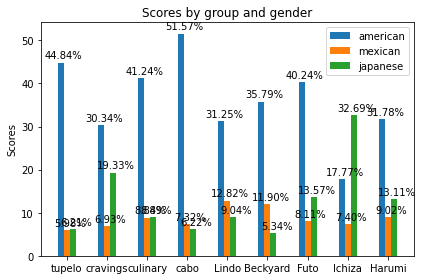

In [51]:
labels = ['tupelo', 'cravings','culinary', 'cabo', 'Lindo', 'Beckyard', 'Futo', 'Ichiza', 'Harumi']
american = [americanTupelo, americanCravings, americanCulinary, americanCabo, americanLindo, americanBeckyard, americanFuto, americanIchiza, americanHarumi] 
mexican = [mexicanTupelo, mexicanCravings, mexicanCulinary, mexicanCabo, mexicanLindo, mexicanBeckyard, mexicanFuto, mexicanIchiza, mexicanHarumi] 
japanese = [japaneseTupelo, japaneseCravings, japaneseCulinary, japaneseCabo, japaneseLindo, japaneseBeckyard, japaneseFuto, japaneseIchiza, japaneseHarumi] 

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, american, width, label='american')
rects2 = ax.bar(x, mexican, width, label='mexican')
rects3 = ax.bar(x + width, japanese, width, label='japanese')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy= (rect.get_x() + rect.get_width(), height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    #size=9,
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [7]:
#Percentuali medie di japanese, mexican e american per ogni tipologia di ristorante
print('AMERICANI')
americanRistoranteAmerican = (americanTupelo + americanCravings + americanCulinary) / 3
print(americanTupelo)
print(americanCravings)
print(americanCulinary)
print(americanRistoranteAmerican)
print('----------------------------------------')

americanRistoranteMexican = (americanCabo + americanLindo + americanBeckyard) / 3
print(americanCabo)
print(americanLindo)
print(americanBeckyard)
print(americanRistoranteMexican)
print('----------------------------------------')

americanRistoranteJapanese = (americanFuto + americanIchiza + americanHarumi) / 3
print(americanFuto)
print(americanIchiza)
print(americanHarumi)
print(americanRistoranteJapanese)
print('----------------------------------------')

print('MESSICANI')
mexicanRistoranteAmerican = (mexicanTupelo + mexicanCravings + mexicanCulinary) / 3
print(mexicanTupelo)
print(mexicanCravings)
print(mexicanCulinary)
print(mexicanRistoranteAmerican)
print('----------------------------------------')

mexicanRistoranteMexican = (mexicanCabo + mexicanLindo + mexicanBeckyard) / 3
print(mexicanCabo)
print(mexicanLindo)
print(mexicanBeckyard)
print(mexicanRistoranteMexican)
print('----------------------------------------')

mexicanRistoranteJapanese = (mexicanFuto + mexicanIchiza + mexicanHarumi) / 3
print(mexicanFuto)
print(mexicanIchiza)
print(mexicanHarumi)
print(mexicanRistoranteJapanese)
print('----------------------------------------')

print('GIAPPONESI')
japaneseRistoranteAmerican = (japaneseTupelo + japaneseCravings + japaneseCulinary) / 3
print(japaneseTupelo)
print(japaneseCravings)
print(japaneseCulinary)
print(japaneseRistoranteAmerican)
print('----------------------------------------')

japaneseRistoranteMexican = (japaneseCabo + japaneseLindo + japaneseBeckyard) / 3
print(japaneseCabo)
print(japaneseLindo)
print(japaneseBeckyard)
print(japaneseRistoranteMexican)
print('----------------------------------------')

japaneseRistoranteJapanese = (japaneseFuto + japaneseIchiza + japaneseHarumi) / 3
print(japaneseFuto)
print(japaneseIchiza)
print(japaneseHarumi)
print(japaneseRistoranteJapanese)
print('----------------------------------------')

AMERICANI
44.83747609942639
30.34300791556728
41.236586612161474
38.80569020905171
----------------------------------------
51.574803149606296
31.25437981779958
35.78643578643579
39.538539584613886
----------------------------------------
40.24096385542169
17.76750330250991
31.782945736434108
29.93047096478857
----------------------------------------
MESSICANI
5.975143403441683
6.926121372031663
8.840061318344405
7.24710869793925
----------------------------------------
7.322834645669292
12.824106517168886
11.904761904761905
10.683901022533362
----------------------------------------
8.112449799196787
7.397622192866579
9.020436927413671
8.176836306492346
----------------------------------------
GIAPPONESI
6.21414913957935
19.32717678100264
8.891159938681655
11.477495286421215
----------------------------------------
6.2204724409448815
9.039943938332165
5.339105339105339
6.866507239460795
----------------------------------------
13.57429718875502
32.694848084544255
13.10782241014799
19.

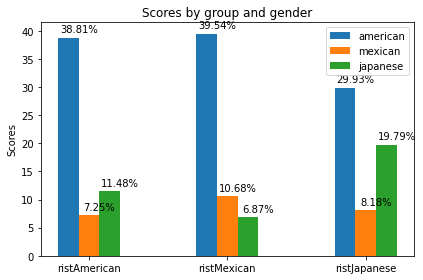

In [8]:
labels = ['ristAmerican', 'ristMexican','ristJapanese']
american = [americanRistoranteAmerican, americanRistoranteMexican, americanRistoranteJapanese] 
mexican = [mexicanRistoranteAmerican, mexicanRistoranteMexican, mexicanRistoranteJapanese]
japanese = [japaneseRistoranteAmerican, japaneseRistoranteMexican, japaneseRistoranteJapanese]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, american, width, label='american')
rects2 = ax.bar(x, mexican, width, label='mexican')
rects3 = ax.bar(x + width, japanese, width, label='japanese')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [9]:
#Percentuali medie di japanese, mexican e american per ogni zona
print('AMERICANI')
americanZonaNC = (americanTupelo + americanCabo + americanFuto) / 3
print(americanTupelo)
print(americanCabo)
print(americanFuto)
print(americanZonaNC)
print('----------------------------------------')

americanZonaNV = (americanCravings + americanLindo + americanIchiza) / 3
print(americanCravings)
print(americanLindo)
print(americanIchiza)
print(americanZonaNV)
print('----------------------------------------')

americanZonaAZ = (americanCulinary + americanBeckyard + americanHarumi) / 3
print(americanCulinary)
print(americanBeckyard)
print(americanHarumi)
print(americanZonaAZ)
print('----------------------------------------')

print('MESSICANI')
mexicanZonaNC = (mexicanTupelo + mexicanCabo + mexicanFuto) / 3
print(mexicanTupelo)
print(mexicanCabo)
print(mexicanFuto)
print(mexicanZonaNC)
print('----------------------------------------')

mexicanZonaNV = (mexicanCravings + mexicanLindo + mexicanIchiza) / 3
print(mexicanCravings)
print(mexicanLindo)
print(mexicanIchiza)
print(mexicanZonaNV)
print('----------------------------------------')

mexicanZonaAZ = (mexicanCulinary + mexicanBeckyard + mexicanHarumi) / 3
print(mexicanCulinary)
print(mexicanBeckyard)
print(mexicanHarumi)
print(mexicanZonaAZ)
print('----------------------------------------')

print('GIAPPONESI')
japaneseZonaNC = (japaneseTupelo + japaneseCabo + japaneseFuto) / 3
print(japaneseTupelo)
print(japaneseCabo)
print(japaneseFuto)
print(japaneseZonaNC)
print('----------------------------------------')

japaneseZonaNV = (japaneseCravings + japaneseLindo + japaneseIchiza) / 3
print(japaneseCravings)
print(japaneseLindo)
print(japaneseIchiza)
print(japaneseZonaNV)
print('----------------------------------------')

japaneseZonaAZ = (japaneseCulinary + japaneseBeckyard + japaneseHarumi) / 3
print(japaneseCulinary)
print(japaneseBeckyard)
print(japaneseHarumi)
print(japaneseZonaAZ)
print('----------------------------------------')

AMERICANI
44.83747609942639
51.574803149606296
40.24096385542169
45.55108103481812
----------------------------------------
30.34300791556728
31.25437981779958
17.76750330250991
26.45496367862559
----------------------------------------
41.236586612161474
35.78643578643579
31.782945736434108
36.26865604501046
----------------------------------------
MESSICANI
5.975143403441683
7.322834645669292
8.112449799196787
7.136809282769254
----------------------------------------
6.926121372031663
12.824106517168886
7.397622192866579
9.049283360689042
----------------------------------------
8.840061318344405
11.904761904761905
9.020436927413671
9.92175338350666
----------------------------------------
GIAPPONESI
6.21414913957935
6.2204724409448815
13.57429718875502
8.66963958975975
----------------------------------------
19.32717678100264
9.039943938332165
32.694848084544255
20.35398960129302
----------------------------------------
8.891159938681655
5.339105339105339
13.10782241014799
9.11269

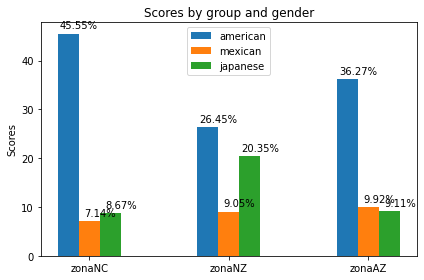

In [11]:
labels = ['zonaNC', 'zonaNZ','zonaAZ']
american = [americanZonaNC, americanZonaNV, americanZonaAZ] 
mexican = [mexicanZonaNC, mexicanZonaNV, mexicanZonaAZ]
japanese = [japaneseZonaNC, japaneseZonaNV, japaneseZonaAZ]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, american, width, label='american')
rects2 = ax.bar(x, mexican, width, label='mexican')
rects3 = ax.bar(x + width, japanese, width, label='japanese')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 'upper center')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

#restaurant.plot(kind='bar',x='name',y='num_children',ax=ax)
#restaurant.groupby('ethnicity')['user_id'].nunique().plot(kind='bar')

#restaurant.assign(dummy = 1).groupby(['ethnicity','restaurant']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',stacked=True,legend=True)
#plt.bar(x1,y1)
#plt.xlabel('etnia')

# disable ticks in the x axis
#plt.xticks([])

# fix the legend or it'll include the dummy variable
#current_handles, _ = plt.gca().get_legend_handles_labels()
#reversed_handles = reversed(current_handles)
#correct_labels = reversed(restaurant['restaurant'].unique())

#plt.legend(reversed_handles,correct_labels)